In [124]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
df_train = pd.read_csv("ex4_train.csv",index_col = 0) 
df_test = pd.read_csv("ex4_test.csv",index_col = 0) 

In [108]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,y
2240,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,4
4253,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8
4263,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8
57,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4788,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,9


In [109]:
#split training data
size = df_train.shape[0]
x = df_train.iloc[:,0:400]
x_data = x.values
y = df_train.iloc[:,-1:]
y_data = y.values
print(x_data.shape, y_data.shape)

(3500, 400) (3500, 1)


In [110]:
#split test data
size2 = df_test.shape[0]
x_test = df_test.iloc[:,0:400]
x_test = x_test.values
y_test = df_test.iloc[:,-1:]
y_test = y_test.values
print(x_test.shape, y_test.shape)

(1500, 400) (1500, 1)


In [111]:
def one_hot_encoding(y):
    if(y.shape[1]!=1):
        print('input is wrong');
        return -1
    length = y.shape[0]
    output = np.zeros((10,length))       
    for i in range(length):         
        if(y[i][0]>9):
            #to prevent index out of bound
            print('label is wrong');
            return -1
        else:
            output[y[i][0]][i]=1   
    return output

In [112]:
y_one_hot = one_hot_encoding(y_data)
y_one_hot.shape

(10, 3500)

In [113]:
def model(x, w1, w2, w3, b1, b2, b3, keep_prob):
   
    hidden_1 = tf.nn.relu(tf.add(tf.matmul(w1,tf.transpose(x)), b1))   
    drop_out_1 = tf.nn.dropout(hidden_1, keep_prob, seed=0)      
    hidden_2 = tf.nn.relu(tf.add(tf.matmul(w2, drop_out_1), b2))   
    drop_out_2 = tf.nn.dropout(hidden_2, keep_prob, seed=0)   
    last_layer = tf.nn.sigmoid(tf.add(tf.matmul(w3, drop_out_2) , b3))    
    return last_layer


def predict(x, w1, w2, w3, b1, b2, b3):    
    hidden_1 = tf.nn.relu(tf.add(tf.matmul(w1,tf.transpose(x)), b1))     
    hidden_2 = tf.nn.relu(tf.add(tf.matmul(w2, hidden_1), b2))     
    last_layer = tf.nn.sigmoid(tf.add(tf.matmul(w3, hidden_2) , b3))   
    return last_layer
    

def initialization(neurons):    
    W1 = tf.get_variable( name="w_1", shape=[neurons[0],400], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    W2 = tf.get_variable( name="w_2", shape=[neurons[1],neurons[0]], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    W3 = tf.get_variable( name="w_3", shape=[neurons[2],neurons[1]], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    b1 = tf.get_variable( name="b_1", shape=[neurons[0],1], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    b2 = tf.get_variable( name="b_2", shape=[neurons[1],1], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    b3 = tf.get_variable( name="b_3", shape=[neurons[2],1], initializer=tf.contrib.layers.xavier_initializer(uniform=False,seed=0,dtype=tf.float32))
    return W1,W2,W3,b1,b2,b3

def getACC(y_true,y_pred):      
    #print("shape", y_true.shape, y_pred.shape)
    count = 0
    total = len(y_true)
    for i in range(total):
        if(y_true[i] != y_pred[i]):
            count +=1
    #print ("error count ", count)     
    return 1 - count/total       

In [169]:
tf.reset_default_graph() 
max_iteration = 1000
X_tensor = tf.placeholder(tf.float32, shape=None, name="x_t")
neurons = [300,200,10]
w1, w2, w3, b1, b2, b3 = initialization(neurons)
keep_rate = tf.placeholder(tf.float32, shape=None, name="keep")
rates = np.arange(0.3, 1 , 0.3);
pred = model(X_tensor,w1, w2, w3, b1, b2, b3, keep_rate)
cross_entropy =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=tf.transpose(y_one_hot), logits=tf.transpose(pred)))
#cross_entropy = tf.losses.softmax_cross_entropy(y_one_hot,pred)
train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)
pre_raw = predict(X_tensor,w1, w2, w3, b1, b2, b3)
predictions =  tf.argmax(input=pre_raw, axis=0)
#probabilities = tf.nn.softmax(pre_raw, name="softmax_tensor")


In [170]:
init = tf.global_variables_initializer()
init2 = tf.local_variables_initializer()
session = tf.Session()
session.run(init)
session.run(init2)
plots = np.zeros((2,len(rates)))

for j in range(len(rates)):
    print("-------------------------------")
    print("keep probability: ", rates[j])    
    
    
    
    for i in range(max_iteration):  
        _, loss,p =  session.run([train,cross_entropy,predictions],feed_dict = {X_tensor:x_data,keep_rate:rates[j]})    
        if(i%100==0):
            print("iteration:", i)        
            print("cost ", loss)
            acc = getACC(y_data, p)
            print("train accuracy ", acc)
            p_test = session.run(predictions,feed_dict = {X_tensor:x_test})
            acc_test = getACC(y_test, p_test)
            print("test accuracy ", acc_test)
    plots[0][j] =  acc
    plots[1][j] =  acc_test
    if(j<len(rates)-1):        
        tf.reset_default_graph()         
        session.run(init)
        session.run(init2)
        w1, w2, w3, b1, b2, b3 = initialization(neurons)

        
print("done")  
session.close()


-------------------------------
keep probability:  0.3
iteration: 0
cost  2.32964
train accuracy  0.10371428571428576
test accuracy  0.1346666666666667
iteration: 100
cost  1.60462
train accuracy  0.928
test accuracy  0.904
iteration: 200
cost  1.53461
train accuracy  0.962
test accuracy  0.9193333333333333
iteration: 300
cost  1.51452
train accuracy  0.9768571428571429
test accuracy  0.9273333333333333
iteration: 400
cost  1.50174
train accuracy  0.984
test accuracy  0.9306666666666666
iteration: 500
cost  1.49341
train accuracy  0.9894285714285714
test accuracy  0.9346666666666666
iteration: 600
cost  1.48918
train accuracy  0.9905714285714285
test accuracy  0.9359999999999999
iteration: 700
cost  1.48402
train accuracy  0.9917142857142858
test accuracy  0.94
iteration: 800
cost  1.48064
train accuracy  0.992
test accuracy  0.9386666666666666
iteration: 900
cost  1.47808
train accuracy  0.9931428571428571
test accuracy  0.9386666666666666
j 0
-------------------------------
keep prob

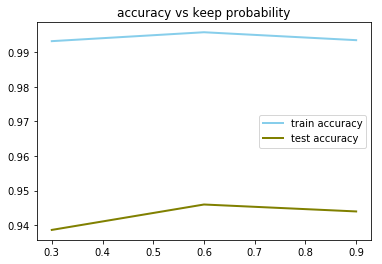

In [171]:
plt.plot( rates, plots[0], marker='', color='skyblue', linewidth=2, label="train accuracy")
plt.plot( rates, plots[1], marker='', color='olive', linewidth=2, label="test accuracy")
plt.legend()
plt.title('accuracy vs keep probability')
plt.show()